### Libraries

First you must load the necessary libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [39]:
# Temperature of the Sun
T_sun = 5780 #[K]

# Planck's Constant
h = 6.626e-34 # [J/s]

# Speed of light
c = 3e8 #[m/s]

# Boltzmann constant
kB = 1.381e-23 # [J/K]

# Stefan-Boltzmann constant
sigma = 5.67e-8 # [W m^-2 K^-4]

# Proportionality constant
K_w = 2897 # [micrometer Kelvin]

### Question 1: Consider a star with temperature of 5780 K

Part a: Plot the intensity of radiation as a function of wavelength (from 0.01 micrometers to 100 m) on a log-log scale with a yrange of 10^-100 to 10^20. Note - plotting over such a large wavelength range will require you to be clever how you define your variable for wavelength. You should have equal intervals in log space.

In [40]:
# Defining Planck's Function
# For part a
B = lambda T, l: 2 * h * (c**2) / (((l * (10**-6))**4) * l * np.expm1(h * c / (kB * (l * (10**-6)) * T)))

# For part b
plnk = lambda l: B(T_sun, l)

In [41]:
# Defining axis range
x_exp = np.linspace(-2, 8, 200) # For plotting purposes
x_range = 10**x_exp # For caclulation purpopses
y_range = np.linspace(-100, 20, 200)

# Calculating Planck's function
B_T = B(T_sun, x_range) # [W m^2 micrometer^-1 Sr-1]

Part b: Compute (numerically) the percentage of the total emitted radiation that falls within the following spectrums as defined on page 58 of Petty.

In [42]:
# Calculating the maximum emission at the specific temperature using the Stefan-Boltzmann law
F_BB = sigma * (T_sun**4) # [W m^-2]

# Calculating the amount of extreme UV radiation from this black body
F_exUV = (integrate.quad(plnk, 0.01, 0.1)[0]) * np.pi

In [43]:
# Calculating percentages

# Extreme UV
Perc_exUV = (F_exUV / F_BB) * 100

Part e: Compute the wavelength of maximum emission and indicate this on both of your graphs with a solid verticle line.

In [44]:
# Wien's Displacement Law
Vis_max = K_w/T_sun

y_max = np.interp(Vis_max, x_range, B_T)

In [45]:
# Creating tick marks
x_num = np.arange(-2, 8.01, 2)
x_ticks = 10**x_num
y_num = np.arange(-100, 20.01, 20)
y_ticks = 10**y_num

Text(0.5, 1.0, 'Blackbody Emission Curve, T = 5780K')

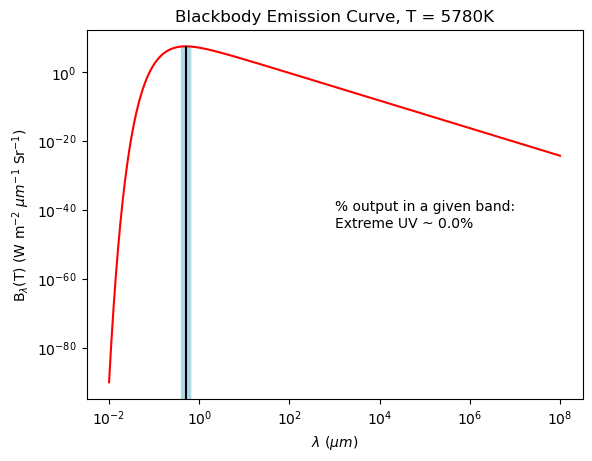

In [46]:
# Plot for part a
plt.plot(x_range, B_T, color = 'red')
# Creating a log scale
plt.xscale('log')
plt.yscale('log')
# Specifying ticks
plt.xticks(x_ticks)
plt.yticks(y_ticks)
# Text for part b
plt.text(10**3, 10**-40, '% output in a given band:')
# Extreme UV
plt.text(10**3, 10**-45, 'Extreme UV ~ ' + str(round(Perc_exUV, 2)) + '%')
# Filling in the visible light wavelengths
plt.fill_between(x_range, B_T, where = np.logical_and(x_range > 0.4, x_range < 0.7), color = 'lightblue')
# Wavelength of maximum emissions
plt.vlines(x = Vis_max, ymin = 0, ymax = y_max, colors = 'k', linestyles = 'solid')
# X-axis label
plt.xlabel('$\lambda$ ($\mu m$)')
# Y-axis label
plt.ylabel('B$_\lambda$(T) (W m$^{-2}$ $\mu m^{-1}$ Sr$^{-1}$)')
# Plot Title
plt.title('Blackbody Emission Curve, T = 5780K')

### Question 2

Plot the intensity of radiation emitted as a function of wavelength on a log-log scale (from 0.01 micrometers to 100 m) for the following temperatures: 6000, 3000, 2000, 1000, 500, 250, and 100 K. Plots should all be on the same graph. Label each of the lines. Each line should be a different color.

In [47]:
# Calculating Planck's function for 6000 K
B_T6000 = B(6000, x_range) # [W m^2 micrometer^-1 Sr-1]

In [48]:
# Creating a variable for temperatures
Temps = [6000, 3000, 2000, 1000, 500, 250, 100] # [K]

# Turning the variables into an array
Temps_array = np.array(Temps) # [K]

# Using Wien's Displacement law
max_T = K_w / Temps_array 

# Using Planck's function
max_wave = B(Temps, max_T)

Text(0.5, 1.0, 'Blackbody Emission Curve for Range of Temperatures')

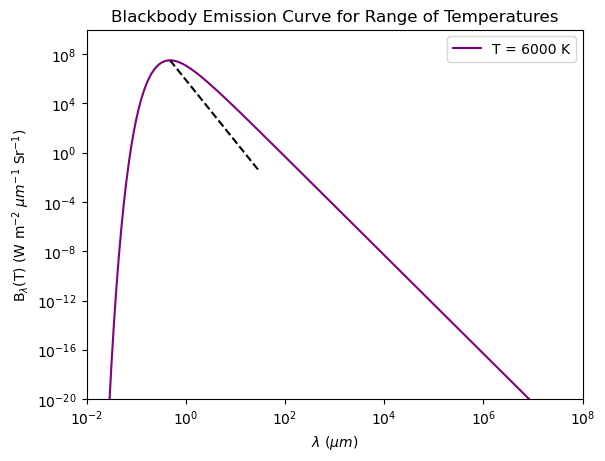

In [49]:
# 6000 K
plt.plot(x_range, B_T6000, color = 'purple', label = 'T = 6000 K')
# Maximum emitted radiation
plt.plot(max_T, max_wave, linestyle = '--', color = 'black')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**-2, 10**8)
plt.ylim(10**-20, 10**10)
plt.legend()
# X-axis label
plt.xlabel('$\lambda$ ($\mu m$)')
# Y-axis label
plt.ylabel('B$_\lambda$(T) (W m$^{-2}$ $\mu m^{-1}$ Sr$^{-1}$)')
# Plot Title
plt.title('Blackbody Emission Curve for Range of Temperatures')

### Question 3

The Rayleigh-James Approximation is said to be valid for longer wavelengths. You can find the formula on page 123 of Petty. Produce two seperate graphs for the intenisty of emitted radiation as a function of wavelength, one for a blackbody of temperature 6000 K and one of temperature 300 K. On each graph, plot the Rayleigh-Jeans approximation as a function of wavelength. Both plots should be on a log-log scale using the same ranges as ussed in problem 2.

In [50]:
# Calulating Planck's Function for given temperatures

# 6000 K
B_6000 = B(6000, x_range)

In [51]:
# Creating a function for the Rayleigh-Jeans Approximation
RJ = lambda T, l: (2 * c * kB * T) / (l * (l * (10**-6))**3)

In [52]:
# Calculating the Rayleigh-Jeans Approximation for the given temperatures

# 6000 K
RJ_6000 = RJ(6000, x_range)

In [53]:
# 90% for 6000 K
B90_T6000 = np.interp(0.90, B_6000 / RJ_6000, x_range)

In [54]:
# Creating a function to find the maximum
y_max_6000 = lambda perc: np.interp(perc, x_range, B_6000)

In [55]:
# Calculating the maximum values

# 90% for 6000 K
y_max_6000_90 = y_max_6000(B90_T6000)

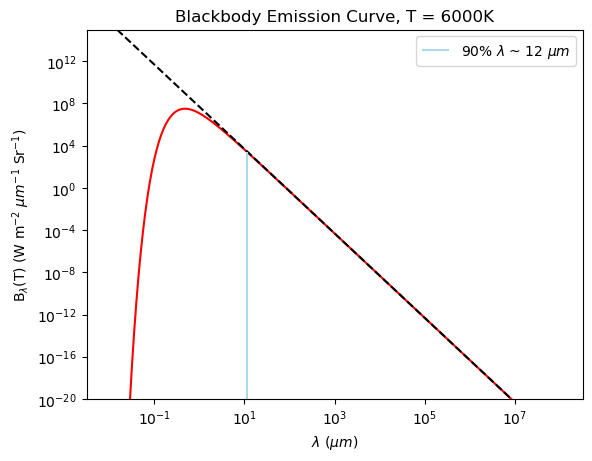

In [56]:
# Planck's Function
plt.plot(x_range, B_6000, color = 'red')
# Rayleigh-Jeans Approximation
plt.plot(x_range, RJ_6000, linestyle = 'dashed', color = 'black')
# 90% line
plt.vlines(x = B90_T6000, ymin = 0, ymax = y_max_6000_90, color = 'lightblue', label = '90% $\lambda$ ~ 12 $\mu m$')
# Y-axis limit
plt.ylim(10**-20, 10**15)
# Creating a log scale
plt.xscale('log')
plt.yscale('log')
# X-axis label
plt.xlabel('$\lambda$ ($\mu m$)')
# Y-axis label
plt.ylabel('B$_\lambda$(T) (W m$^{-2}$ $\mu m^{-1}$ Sr$^{-1}$)')
# Plot Title
plt.title('Blackbody Emission Curve, T = 6000K')
plt.legend()